In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [3]:
model= tf.keras .models.load_model('trainnew_modell.keras')

In [5]:
import h5py

try:
    with h5py.File("trainnew_modell.keras", "r") as f:
        print("Model file is valid")
except Exception as e:
    print("Error:", e)

Model file is valid


In [6]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001E2529F84C0>>

In [7]:
class_name = ['healthy', 'unhealthy'] 

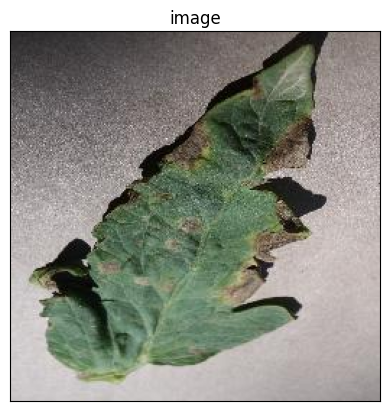

In [8]:
image_path="test/testimg/unh4.jpg"

img=cv2.imread(image_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
plt.figure()
plt.imshow(img)
plt.title("image")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

In [7]:
## Testing model


In [9]:
image =tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr]) #convert single image to batch
print(input_arr.shape)


(1, 128, 128, 3)


In [10]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 235ms/step


(array([[9.437661e-09, 1.000000e+00]], dtype=float32), (1, 2))

In [11]:
result_index = np.argmax(prediction)
result_index

1

In [12]:
print(f"🔍 Prediction shape: {prediction.shape}, Prediction values: {prediction}")


🔍 Prediction shape: (1, 2), Prediction values: [[9.437661e-09 1.000000e+00]]


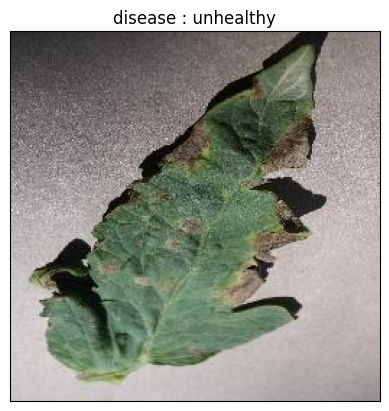

In [13]:
model_prediction = class_name[result_index]
plt.figure()
plt.imshow(img)
plt.title(f"disease : {model_prediction}")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()
